1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def roulette():
    pool = [
        0, 32, 15, 19, 4, 21, 2, 25, 17, 34, 6, 27,
        13, 36, 11, 30, 8, 23, 10, 5, 24, 16, 33, 1,
        20, 14, 31, 9, 22, 18, 29, 7, 28, 12, 35, 3, 26
    ]
    num = random.choice(pool)
    if pool.index(num) % 2 != 0 and num != 0:
        color = 'red'
    elif pool.index(num) % 2 == 0 and num != 0:
        color = 'black'
    else:
        color = ''
    return num, color

In [3]:
result = pd.Series([0 for _ in range(37)], index=[i for i in range(37)])

In [4]:
for _ in range(1000):
    result[roulette()[0]] += 1

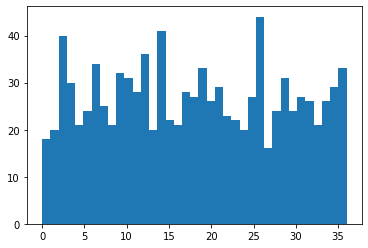

In [6]:
plt.hist(result.index, bins=37, weights=result)
plt.show()

# Задание2

1.Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [7]:
date = pd.DataFrame({'count': [0 for _ in range(37)]})

In [8]:
pool = [
    0, 32, 15, 19, 4, 21, 2, 25, 17, 34, 6, 27,
    13, 36, 11, 30, 8, 23, 10, 5, 24, 16, 33, 1,
    20, 14, 31, 9, 22, 18, 29, 7, 28, 12, 35, 3, 26
]
for i in date.index:
    if pool.index(i) % 2 != 0 and i != 0:
        date.loc[i, 'color'] = 'red'
    elif pool.index(i) % 2 == 0 and i != 0:
        date.loc[i, 'color'] = 'black'

In [9]:
for _ in range(10000):
    num = roulette()[0]
    date.loc[num, 'count'] += 1

Вероятность выпадения красного

In [10]:
P_red = date.loc[date['color'] == 'red', 'count'].sum() \
                                / date['count'].sum()
P_red

0.4887

Вероятность выпадения черного

In [11]:
P_black = date.loc[date['color'] == 'black', 'count'].sum() \
                                  / date['count'].sum()
P_black

0.4854

Вероятность выпадения черного и красного

In [13]:
date.loc[~date['color'].isnull(), 'count'].sum() / date['count'].sum()

0.9741

In [14]:
P_red + P_black

0.9741

2. Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [15]:
import numpy as np

In [16]:
x = pd.DataFrame([np.random.rand(10) for _ in range(10)])

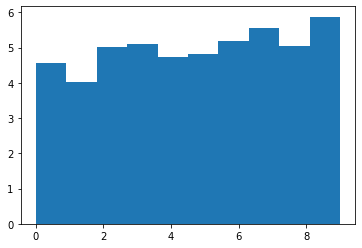

In [17]:
plt.hist(x.index, weights=x.T.sum())
plt.show()

# 3.

1.Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты

In [18]:
import numpy as np
import math

In [19]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(len(x)):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

3779 10000 0.3779


In [20]:
k = 2
n = 4

In [21]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

In [22]:
P = c * 1/2**n
P

0.375

2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [23]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
x = a + b + c + d + f + e
for i in range(len(x)):
    if x[i] == 3:
        k += 1
print(k, n, k/n)

3091 10000 0.3091


In [24]:
k = 3
n = 6

In [25]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))

In [26]:
P = c * 1/2**n
P

0.3125

4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k¶

In [31]:
import itertools

In [32]:
for p in itertools.permutations('012345', 2):
    print(*p, sep='')


01
02
03
04
05
10
12
13
14
15
20
21
23
24
25
30
31
32
34
35
40
41
42
43
45
50
51
52
53
54


In [33]:
n = 6
k = 2
n * (n - k + 1)

30

In [34]:
for p in itertools.combinations('012345', 2):
    print(*p, sep='')

01
02
03
04
05
12
13
14
15
23
24
25
34
35
45


In [35]:
n = 6
k = 2
math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

15.0

5. Дополните код расчетом коэффициента корреляции x и y по формуле:

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

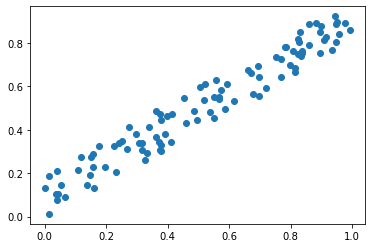

In [38]:
n = 100
r = 0.8
x =np.random.rand(n)
y = r * x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')

In [39]:
np.corrcoef(x,y)

array([[1.        , 0.97154829],
       [0.97154829, 1.        ]])

In [40]:
np.sum((x - x.mean()) * (y - y.mean())) / np.sqrt(np.sum((x - x.mean()) ** 2) * np.sum((y - y.mean()) ** 2))

0.9715482932473821